<a href="https://colab.research.google.com/github/hdk1729/DL/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic way to implement neural network by tensorflow

Fashion Dataset
Neural Network need data to learn. There is data called Fashion MNIST dataset( Zalando's article images) with 0,000 images of 28 pixels width and 28 pixels height in greyscale

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
import matplotlib.pyplot as plt


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()  ## load data in memory
# x_train — image (pixel) data for 60,000 clothes. Used for building our model.
# x_test — image (pixel) data for 10,000 clothes. Used for testing and validating our model.
# y_train — classes (clothing type) for the clothing above. Used for building our model.
# y_test — classes (clothing type) for the clothing above. Used for testing and validating our model.

4422102/4422102 [==============================] - 0s 0us/step


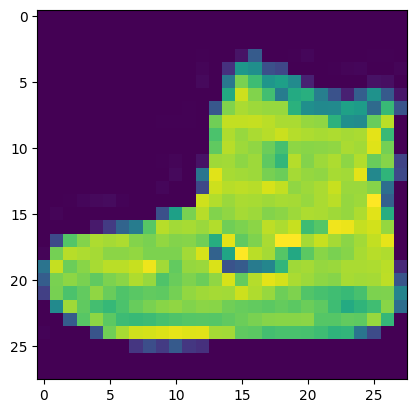

In [ ]:
plt.imshow(x_train[0])

In [ ]:
x_train,x_test =x_train/255.0,x_test/255.0

**Build your Neural Network using Keras**

In [ ]:
model = keras.Sequential([
    ##Flatten layer used to convert 2D to 1D so to make 784 neuron in input layer
    Flatten(input_shape=(28, 28)),
    # use to insert hidden layer
    Dense(units=256, activation='sigmoid'), # units:it set no of neuron for each layer ,activation: parameter specifies a function that decides whether “the opinion” of a particular neuron
    Dense(units=10, activation='softmax')  #last (output) layer It has 10 neurons because we have 10 different types of clothing in our data. You get the predictions of the model from this layer.
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Train your model**

In [ ]:
model.compile(optimizer='sgd',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),  #Logits are the raw, unnormalized scores produced by the model before applying the softmax activation function.
              metrics=['accuracy'])

In [ ]:
history= model.fit(x_train,y_train, validation_split=0.1,validation_data=(x_test,y_test), epochs=5)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 5s 3ms/step - loss: 1.2008 - accuracy: 0.6726 - val_loss: 0.8271 - val_accuracy: 0.7363
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7287 - accuracy: 0.7588 - val_loss: 0.6869 - val_accuracy: 0.7620
Epoch 3/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6344 - accuracy: 0.7803 - val_loss: 0.6236 - val_accuracy: 0.7814
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.5852 - accuracy: 0.7966 - val_loss: 0.5889 - val_accuracy: 0.7889
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5530 - accuracy: 0.8076 - val_loss: 0.5601 - val_accuracy: 0.8031


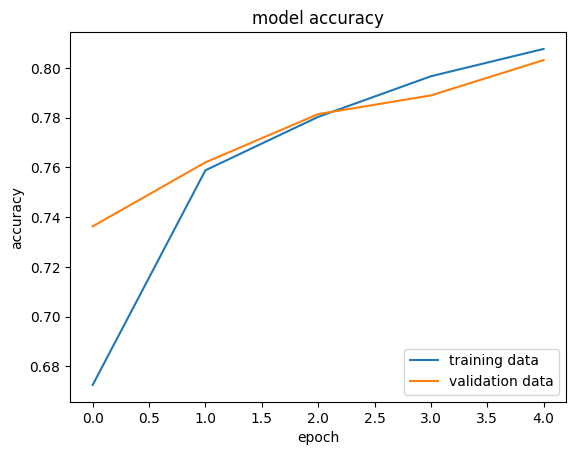

In [ ]:
#visualizing the accuracy and loss
plt.plot(history.history['accuracy'],label='Train accuracy')
plt.plot(history.history['val_accuracy'],label='Validation accuracy')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')

plt.legend(['training data','validation data'],loc ='lower right')

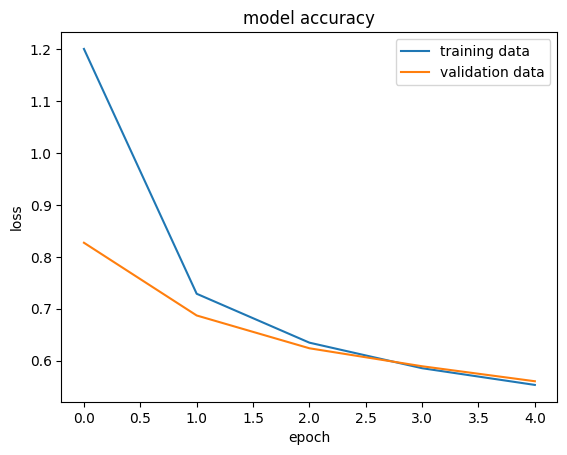

In [ ]:
plt.plot(history.history['loss'],label='Train lose')
plt.plot(history.history['val_loss'],label='Validation  lose')
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('loss')

plt.legend(['training data','validation data'],loc ='upper right')

In [ ]:
#testing

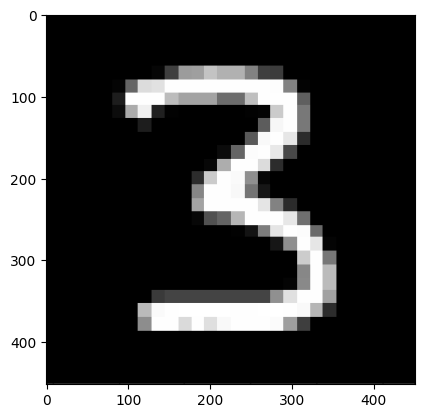

In [ ]:
import cv2
test_img=cv2.imread('/content/0_kKxxK1YXSyWMEBtS.png')
plt.imshow(test_img)

In [ ]:
test_img.shape

(452, 451, 3)

In [ ]:
test_img=cv2.cvtColor(test_img,cv2.COLOR_BGR2GRAY)

In [ ]:
test_img.shape

(452, 451)

In [ ]:
test_img =cv2.resize(test_img,(28,28))

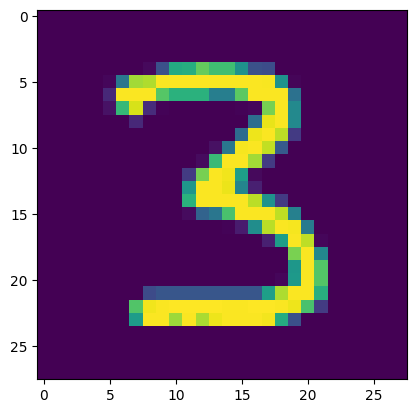

In [ ]:
plt.imshow(test_img)

In [ ]:
import numpy  as np
test_img =np.reshape(test_img,(1,28,28))

In [ ]:
model.predict(test_img)

1/1 [==============================] - 0s 84ms/step


array([[1.2164273e-02, 2.4550661e-02, 1.1717786e-02, 5.4969162e-02,
        7.1410447e-01, 1.2235475e-06, 2.6344761e-02, 2.7139693e-02,
        1.1854752e-03, 1.2782249e-01]], dtype=float32)

In [ ]:
np.argmax(model.predict(test_img)[0])

1/1 [==============================] - 0s 17ms/step


4

In [ ]:
model.predict(x_test[:10])

1/1 [==============================] - 0s 41ms/step


array([[1.36316216e-04, 7.02797770e-05, 3.98445816e-04, 3.09382071e-04,
        4.12764377e-04, 2.49531910e-01, 4.65276215e-04, 3.28033090e-01,
        1.68887153e-02, 4.03753757e-01],
       [8.98168946e-04, 7.87185927e-05, 8.97145569e-01, 3.99633165e-04,
        2.97577027e-02, 4.69220722e-05, 7.11889341e-02, 7.14174007e-07,
        4.70953935e-04, 1.26367959e-05],
       [2.38344597e-04, 9.98352408e-01, 1.51969158e-04, 6.25375542e-04,
        5.94595913e-04, 1.20537902e-06, 3.01353684e-05, 3.43833381e-06,
        2.15027603e-06, 2.90112894e-07],
       [3.63633066e-04, 9.93806183e-01, 5.26219956e-04, 4.06798674e-03,
        1.11019961e-03, 1.73211229e-05, 8.33030645e-05, 1.86268371e-05,
        3.68501810e-06, 2.96506164e-06],
       [1.62716240e-01, 3.78554896e-03, 1.98675483e-01, 2.59852167e-02,
        2.41290480e-02, 2.62583909e-03, 5.73867023e-01, 2.11769715e-04,
        6.98996428e-03, 1.01377524e-03],
       [6.11641770e-03, 9.71507132e-01, 2.05501867e-03, 5.09438338e-03,
   

In [ ]:
for arr in model.predict(x_test[:10]):
  print(np.argmax(arr))

1/1 [==============================] - 0s 16ms/step
9
2
1
1
6
1
4
6
5
7
